In [163]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
# importing the dataset
df = pd.read_csv('/content/car.csv')

In [165]:
# checking the sample data from the dataset
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
111,Royal Enfield Thunder 350,2016,1.15,1.50,8700,Petrol,Individual,Manual,0
290,amaze,2014,4.50,6.40,19000,Petrol,Dealer,Manual,0
87,corolla altis,2012,5.90,13.74,56000,Petrol,Dealer,Manual,0
10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
212,creta,2016,11.25,13.60,22671,Petrol,Dealer,Manual,0


In [166]:
# makeing the copy of the dataset to ensure their is no changes in the original dataframe
df1 = df.copy()

In [167]:
# While seeing the data i Observerd lot of data have price less the 2 lakhs so i printed all the cars which has price less than 2 lakhs
df1[df1['Present_Price'] < 2]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0
197,Honda CB twister,2010,0.16,0.51,33000,Petrol,Individual,Manual,0
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0


In [168]:
# after observing the data i noticed that all those data are of motorcycle not cars
indexs = df1[df1['Present_Price'] < 2].index

In [169]:
# as we are predicting the selling price of car motor cycle data can shift the mean meadian and avg which can make our prediction wrong hence i drop those rows
df1.drop(index = indexs , inplace = True)

In [170]:
df1.drop(index = [105 , 106 , 112] , inplace=True) # there are some sport bicks having price more than 2 so i droped those too

In [171]:
df1.to_csv('cleaned_df.csv')  # making new csv file which just have data of cars

In [172]:
new_df = pd.read_csv('/content/cleaned_df.csv') # makeing new dataframe

In [173]:
new_df.drop(columns = ['Unnamed: 0'] , inplace = True) # drop reduandant column generate while creating new dataframe

In [174]:
new_df['Car Age'] = 2025 - new_df['Year'] # Creating new Column named as "Car Age" by substracting the year column with 2025 (current year)

In [175]:
new_df.sample(5) # sample data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car Age
148,i20,2016,5.25,7.60,17000,Petrol,Dealer,Manual,0,9
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0,10
146,verna,2015,5.95,9.40,36000,Petrol,Dealer,Manual,0,10
32,swift,2014,4.95,7.49,39000,Diesel,Dealer,Manual,0,11
128,i20,2012,3.10,6.79,52132,Diesel,Dealer,Manual,0,13


In [176]:
new_df.describe() # checking the stats of all numerical columns

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2013.590000,6.691650,10.980750,41404.880000,0.035000,11.410000
std,2.886792,5.150122,8.877698,27415.814725,0.253171,2.886792
min,2003.000000,0.350000,2.280000,2071.000000,0.000000,7.000000
25%,2012.000000,3.637500,6.467500,22332.750000,0.000000,9.000000
50%,2014.000000,5.250000,8.450000,40000.000000,0.000000,11.000000
75%,2016.000000,7.562500,13.495000,53513.750000,0.000000,13.000000
max,2018.000000,35.000000,92.600000,197176.000000,3.000000,22.000000


In [177]:
new_df.info() # No Columns has a null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       200 non-null    object 
 1   Year           200 non-null    int64  
 2   Selling_Price  200 non-null    float64
 3   Present_Price  200 non-null    float64
 4   Driven_kms     200 non-null    int64  
 5   Fuel_Type      200 non-null    object 
 6   Selling_type   200 non-null    object 
 7   Transmission   200 non-null    object 
 8   Owner          200 non-null    int64  
 9   Car Age        200 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


# 1. Univariate Analysis

    1. Numerical columns
        1. Selling_Price
        2. Present_Price
        3. Driven_kms
        4. Car Age

    2. Categorical columns
        1. Fuel_Type
        2. Selling_type
        3. Transmission
        4. Owner
        5. Car_Name

In [178]:
new_df['Present_Price'].describe()

,Present_Price
count,200.000000
mean,10.980750
std,8.877698
min,2.280000
25%,6.467500
50%,8.450000
75%,13.495000
max,92.600000


<Axes: >

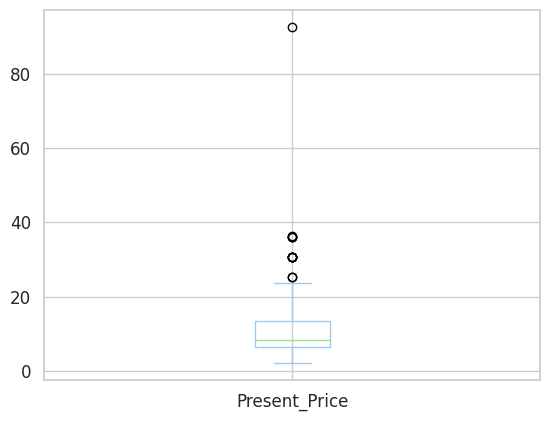

In [179]:
new_df['Present_Price'].plot(kind = 'box') # ploting box plot on present price

<Axes: ylabel='Frequency'>

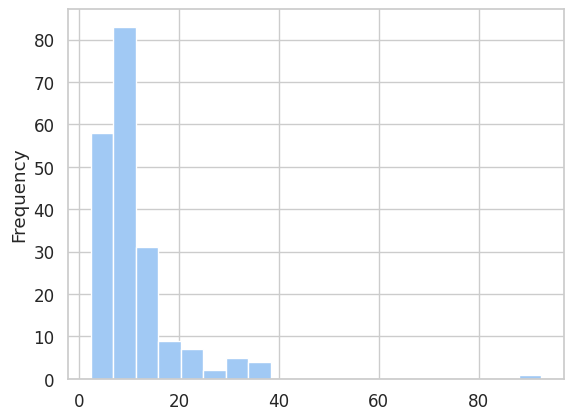

In [180]:
new_df['Present_Price'].plot(kind = 'hist' , bins=20) # ploting hostogram on present price

In [181]:
new_df['Selling_Price'].describe()

,Selling_Price
count,200.000000
mean,6.691650
std,5.150122
min,0.350000
25%,3.637500
50%,5.250000
75%,7.562500
max,35.000000


<Axes: >

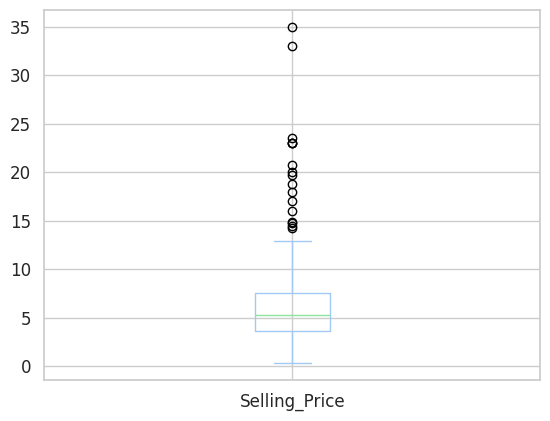

In [182]:
new_df['Selling_Price'].plot(kind = 'box') # ploting box plot on Selling price

<Axes: ylabel='Frequency'>

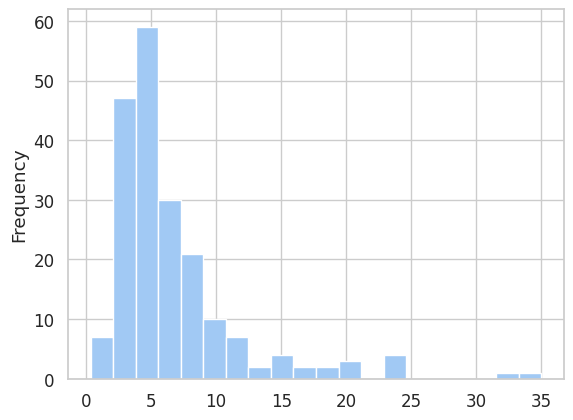

In [183]:
new_df['Selling_Price'].plot(kind = 'hist' , bins=20) # ploting hostogram on Selling price

In [184]:
new_df['Driven_kms'].describe()

,Driven_kms
count,200.000000
mean,41404.880000
std,27415.814725
min,2071.000000
25%,22332.750000
50%,40000.000000
75%,53513.750000
max,197176.000000


<Axes: >

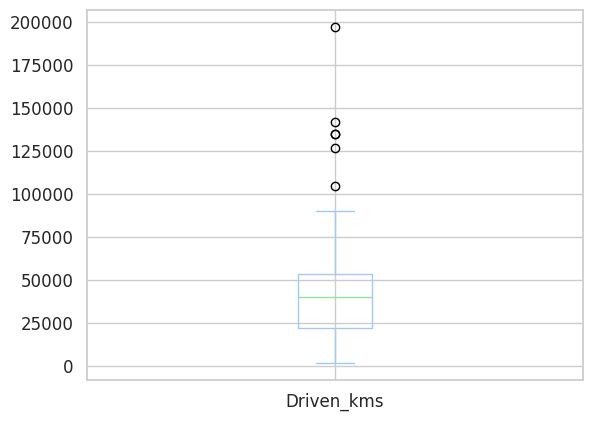

In [185]:
new_df['Driven_kms'].plot(kind = 'box') # ploting box plot on Driven kms

<Axes: ylabel='Frequency'>

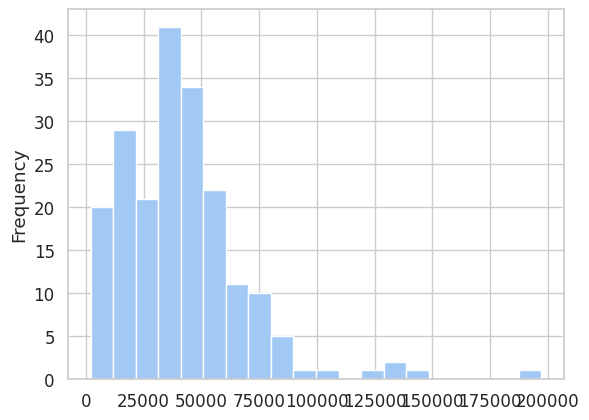

In [186]:
new_df['Driven_kms'].plot(kind = 'hist' , bins=20) # ploting hostogram on Driven kms

In [187]:
new_df['Car Age'].describe()

,Car Age
count,200.000000
mean,11.410000
std,2.886792
min,7.000000
25%,9.000000
50%,11.000000
75%,13.000000
max,22.000000


<Axes: >

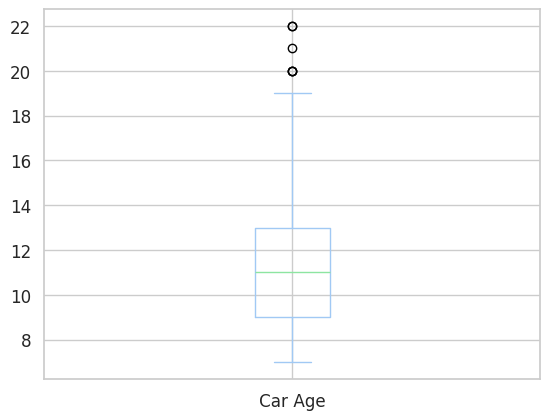

In [188]:
new_df['Car Age'].plot(kind = 'box') # ploting box plot on Car Age

<Axes: ylabel='Frequency'>

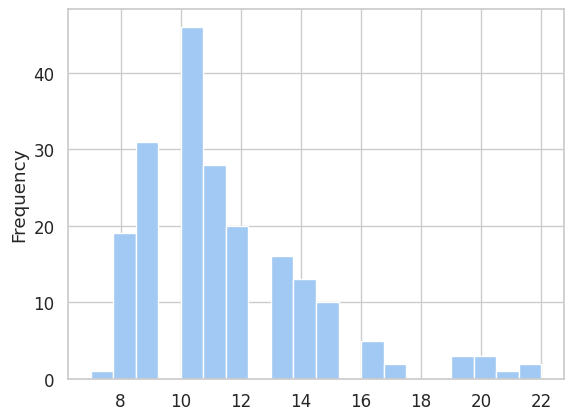

In [189]:
new_df['Car Age'].plot(kind = 'hist' , bins=20) # ploting hostogram on Car Age

In [190]:
new_df['Fuel_Type'].value_counts() # checking the values are it is categorical column

,count
Fuel_Type,
Petrol,138
Diesel,60
CNG,2


<Axes: ylabel='count'>

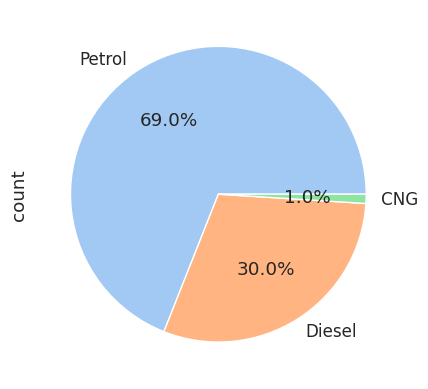

In [191]:
new_df['Fuel_Type'].value_counts().plot(kind = 'pie' , autopct='%.1f%%') # ploting pie chart on Fuel type

<Axes: ylabel='count'>

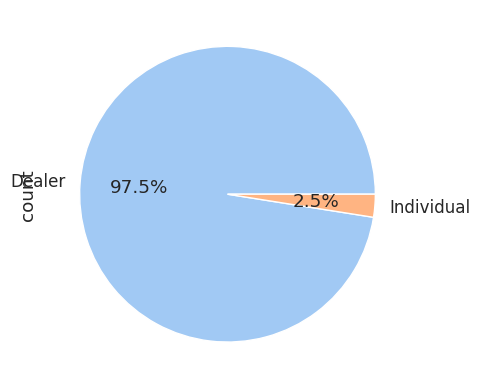

In [192]:
new_df['Selling_type'].value_counts()
new_df['Selling_type'].value_counts().plot(kind = 'pie' , autopct='%.1f%%') # ploting pie chart on Selling type

# most of the cars are sold through dealers

<Axes: ylabel='count'>

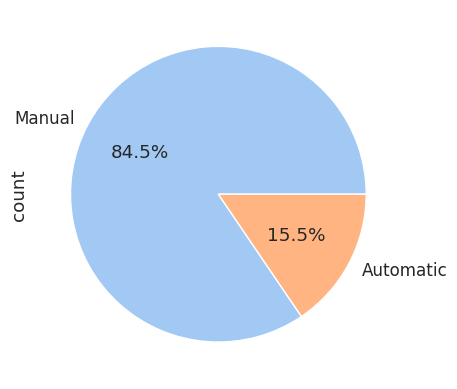

In [193]:
new_df['Transmission'].value_counts()
new_df['Transmission'].value_counts().plot(kind = 'pie' , autopct='%.1f%%') # ploting pie chart on Transmission

# majority of cars are manual

<Axes: ylabel='count'>

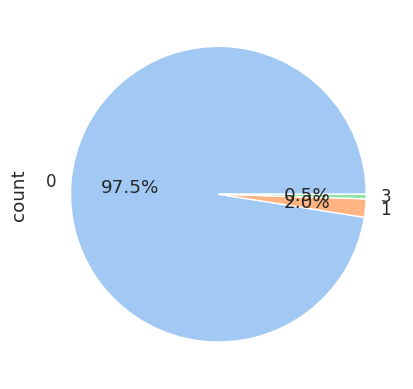

In [194]:
new_df['Owner'].value_counts()
new_df['Owner'].value_counts().plot(kind = 'pie' , autopct='%.1f%%') # ploting pie chart on Owner

# Almost all the cars are Sold from original owner to 2nd owner

# 2. Bivariate Analysis

    1. Numerical vs Numerical
        1. Selling_Price vs Present_Price
        2. Selling_Price vs Driven_kms

    2. Categorical vs Numerical
        1. Selling_Price vs Fuel_Type
        2. Selling_Price vs Transmission
        3. Selling_Price vs Owner

    3. Categorical vs Categorical
        1. Fuel_Type vs Transmission

In [195]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1) # set plot style

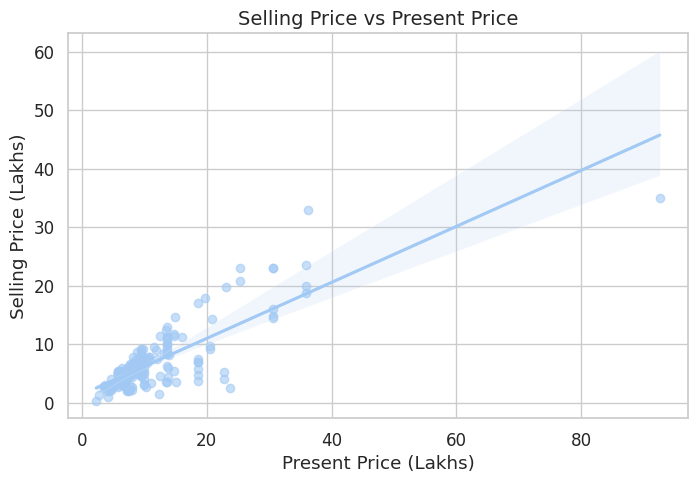

In [196]:
# With increase in Present Price, selling price will also increase
plt.figure(figsize=(8,5))
sns.regplot(data=new_df, x="Present_Price", y="Selling_Price", scatter_kws={"alpha":0.6})
plt.title("Selling Price vs Present Price", fontsize=14)
plt.xlabel("Present Price (Lakhs)")
plt.ylabel("Selling Price (Lakhs)")
plt.show()

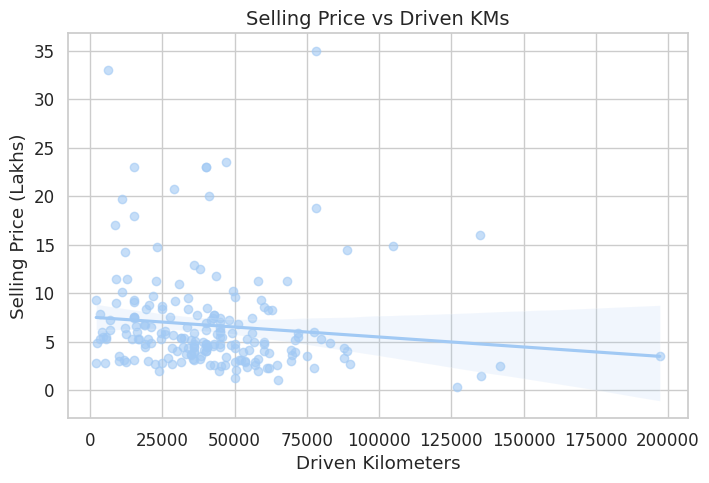

In [197]:
# Scatter plot + regression line: Selling Price vs Driven KMs
plt.figure(figsize=(8,5))
sns.regplot(data=new_df, x="Driven_kms", y="Selling_Price", scatter_kws={"alpha":0.6})
plt.title("Selling Price vs Driven KMs", fontsize=14)
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (Lakhs)")
plt.show()

/tmp/ipython-input-4078616792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x="Fuel_Type", y="Selling_Price", palette="Set2")


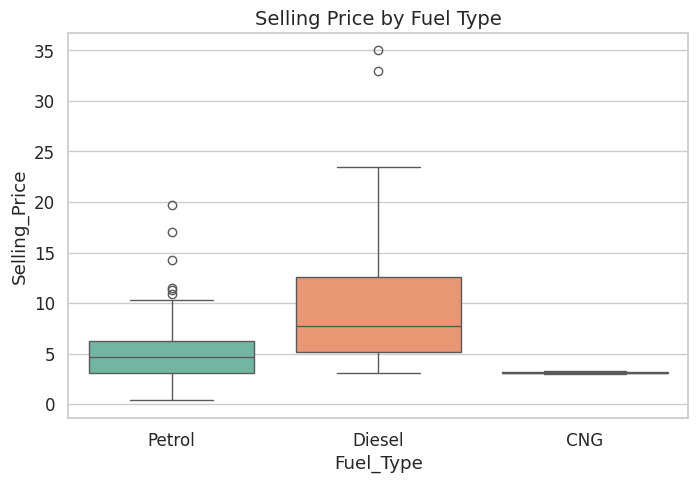

In [198]:
# Boxplot: Selling Price vs Fuel Type
# Diesel Cars have higher price point
plt.figure(figsize=(8,5))
sns.boxplot(data=new_df, x="Fuel_Type", y="Selling_Price", palette="Set2")
plt.title("Selling Price by Fuel Type", fontsize=14)
plt.show()

/tmp/ipython-input-1049735828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x="Transmission", y="Selling_Price", palette="Set3")


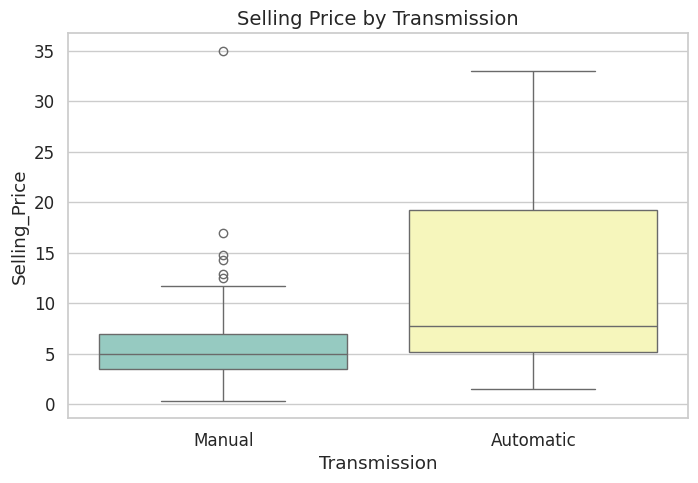

In [199]:
# Boxplot: Selling Price vs Transmission
# Automatic Cars have higher price point
plt.figure(figsize=(8,5))
sns.boxplot(data=new_df, x="Transmission", y="Selling_Price", palette="Set3")
plt.title("Selling Price by Transmission", fontsize=14)
plt.show()


/tmp/ipython-input-973596865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x="Owner", y="Selling_Price", palette="coolwarm")


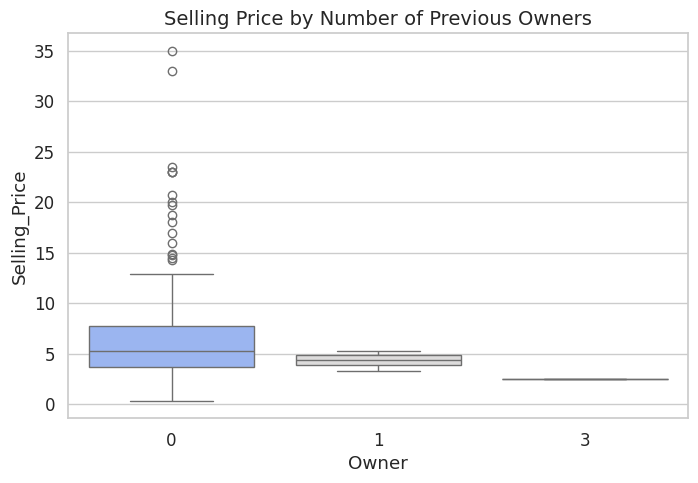

In [200]:
# Boxplot: Selling Price vs Owner
# Although there is no data about more number of seller but with increase in number of owner selling price decrease
plt.figure(figsize=(8,5))
sns.boxplot(data=new_df, x="Owner", y="Selling_Price", palette="coolwarm")
plt.title("Selling Price by Number of Previous Owners", fontsize=14)
plt.show()

In [201]:
ct = pd.crosstab(new_df['Fuel_Type'], new_df['Transmission'])
print("\nCrosstab: Fuel Type vs Transmission")
print(ct)


Crosstab: Fuel Type vs Transmission
Transmission  Automatic  Manual
Fuel_Type                      
CNG                   0       2
Diesel               12      48
Petrol               19     119


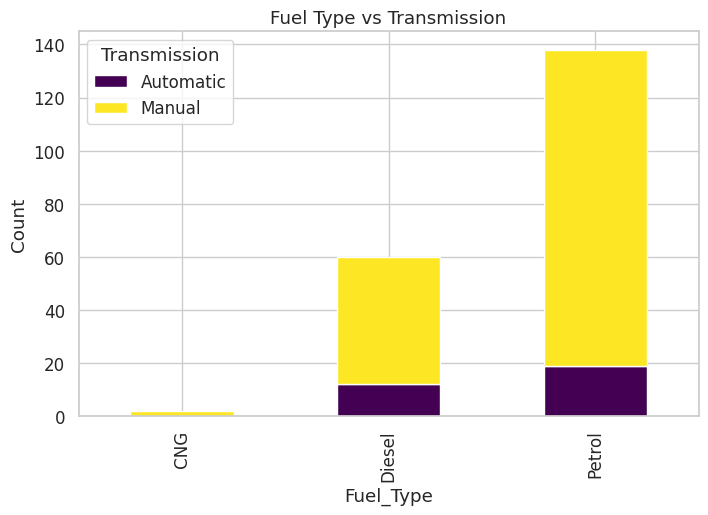

In [202]:
# count of cars with differnt fuel type and trsmission type
ct.plot(kind="bar", stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Fuel Type vs Transmission")
plt.ylabel("Count")
plt.show()

# 3. Multivariate Analysis




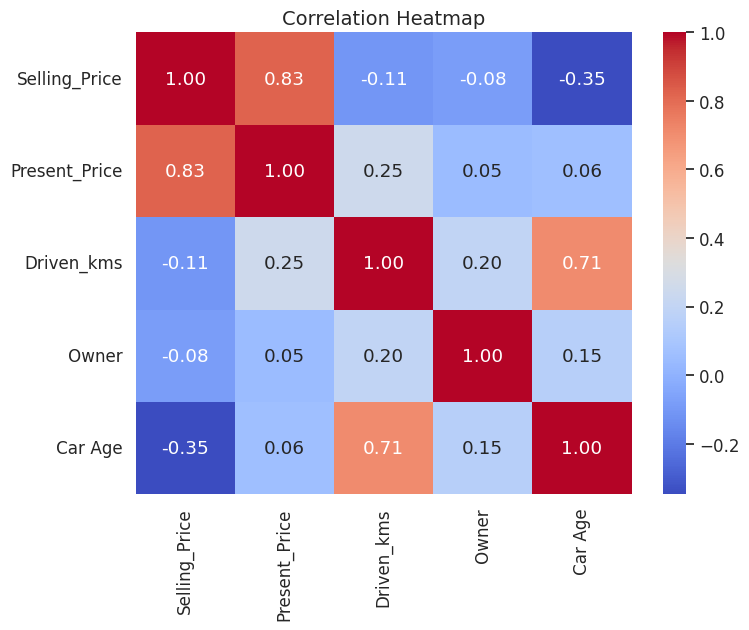

In [203]:
# 1. Correlation Heatmap (Numerical Features)

plt.figure(figsize=(8,6))
corr = new_df.drop(columns=["Year"]).corr(numeric_only=True)  # only numerical columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

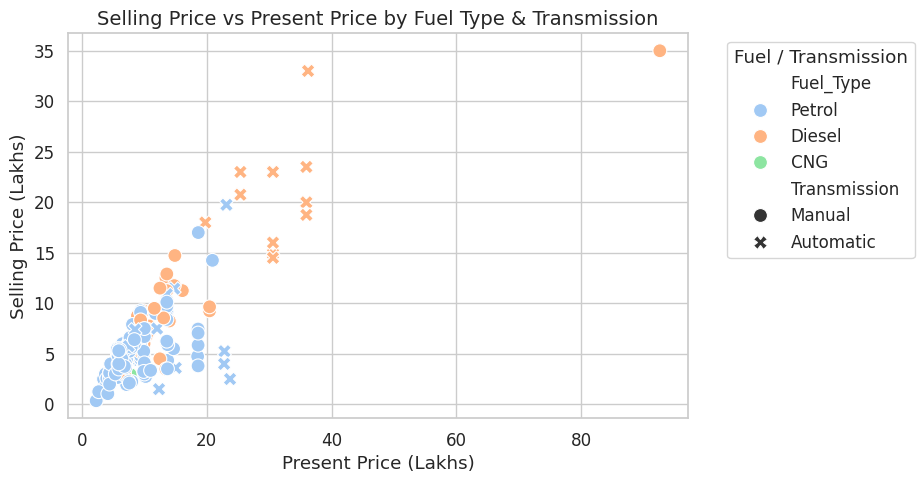

In [204]:
# 2. Enhanced Scatter Plot with Hue (Numerical + Categorical)
# More expensive cars are automatic and with type diesel
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=new_df,
    x="Present_Price",
    y="Selling_Price",
    hue="Fuel_Type",
    style="Transmission",
    s=100
)

plt.title("Selling Price vs Present Price by Fuel Type & Transmission", fontsize=14)
plt.xlabel("Present Price (Lakhs)")
plt.ylabel("Selling Price (Lakhs)")
plt.legend(title="Fuel / Transmission", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

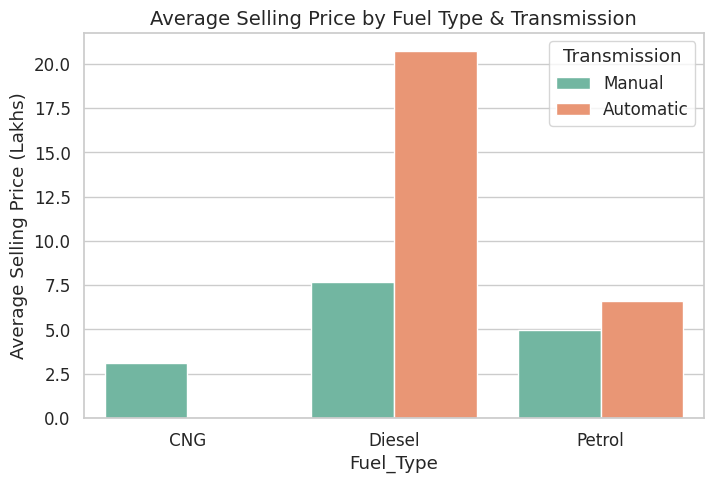

In [205]:
# 3. Grouped Aggregated Analysis
# Disel cars are expensive than petrol cars
grouped = new_df.groupby(["Fuel_Type", "Transmission"])["Selling_Price"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(
    data=grouped,
    x="Fuel_Type",
    y="Selling_Price",
    hue="Transmission",
    palette="Set2"
)
plt.title("Average Selling Price by Fuel Type & Transmission", fontsize=14)
plt.ylabel("Average Selling Price (Lakhs)")
plt.show()

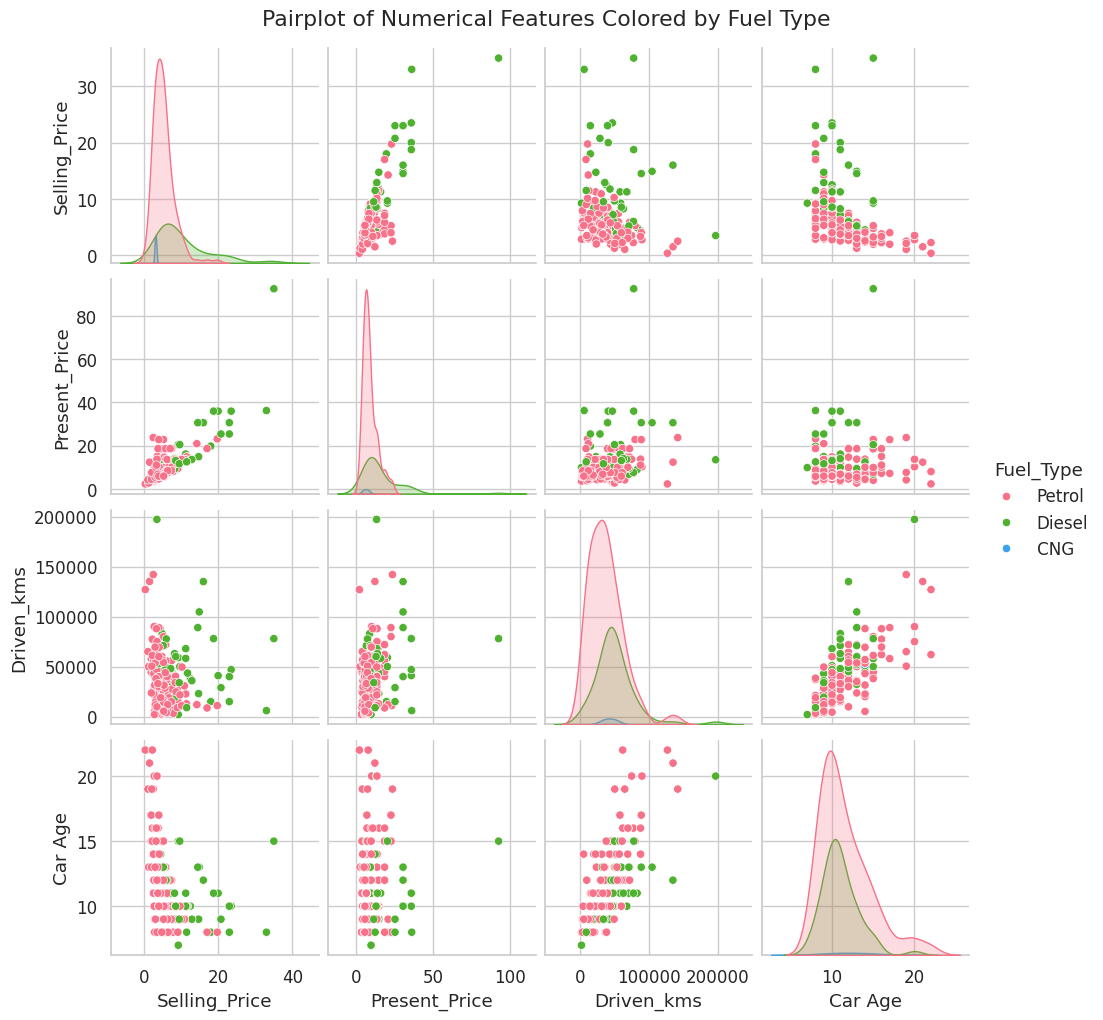

In [206]:
# 4. Pairplot (Numerical Features + Category Hue)

sns.pairplot(
    new_df,
    vars=["Selling_Price", "Present_Price", "Driven_kms", "Car Age"],
    hue="Fuel_Type",
    diag_kind="kde",
    palette="husl"
)
plt.suptitle("Pairplot of Numerical Features Colored by Fuel Type", y=1.02)
plt.show()

In [207]:
# Price Depreciation Rate with age of the car
new_df['Price Depreciation Rate'] = (((new_df['Present_Price'] - new_df['Selling_Price']) / new_df['Car Age']) * 100).round(2)

In [208]:
# Percentage price drop of the car
new_df['Price_Drop_%'] = (
    (new_df['Present_Price'] - new_df['Selling_Price']) / new_df['Present_Price'] * 100
).round(2)


In [209]:
# Avg Drop in price percentage based on selling type
avg_drop_pct = new_df.groupby("Selling_type")['Price_Drop_%'].mean().reset_index()
print(avg_drop_pct)

  Selling_type  Price_Drop_%
0       Dealer     36.028462
1   Individual     60.492000


/tmp/ipython-input-4274335202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


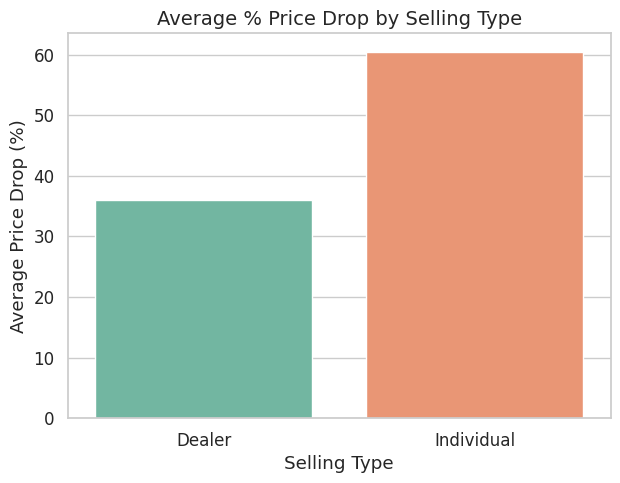

In [210]:
# Drop in selling price based on selling type
plt.figure(figsize=(7,5))
sns.barplot(
    data=avg_drop_pct,
    x='Selling_type',
    y='Price_Drop_%',
    palette='Set2'
)
plt.title("Average % Price Drop by Selling Type", fontsize=14)
plt.ylabel("Average Price Drop (%)")
plt.xlabel("Selling Type")
plt.show()

In [211]:
# Removing outlier from the data using iqr method

def remove_outliers_iqr(df, column):
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

# removing outliers in Selling_Price , Present_Price, Driven_kms, Car Age
num_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Car Age']

for col in num_cols:
    new_df = remove_outliers_iqr(new_df, col)

# Check shape after removing outliers
print("Dataset shape after removing outliers:", new_df.shape)

Dataset shape after removing outliers: (163, 12)


# Linear regression using scikit learn library

In [212]:
# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(new_df, columns=['Fuel_Type', 'Transmission', 'Owner'], drop_first=True)

In [213]:
# Use only one feature for simple linear regression
X = df_encoded[['Present_Price']]
y = df_encoded['Selling_Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

MAE: 1.240
MSE: 2.689
RMSE: 1.640
R2 Score: 0.571


# Linear regression without using library

In [215]:
# Convert training data to numpy arrays and flatten
X_np = np.array(X_train).flatten()
y_np = np.array(y_train)

# Calculate slope (m) using least squares formula
m = np.sum((X_np - X_np.mean()) * (y_np - y_np.mean())) / np.sum((X_np - X_np.mean())**2)

# Calculate intercept (c)
c = y_np.mean() - m * X_np.mean()

# Predict on test data
X_test_np = np.array(X_test).flatten()
y_pred_manual = m * X_test_np + c

y_test_np = np.array(y_test)

mae_manual = mean_absolute_error(y_test_np, y_pred_manual)
mse_manual = mean_squared_error(y_test_np, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
r2_manual = r2_score(y_test_np, y_pred_manual)

print(f"Manual Linear Regression Results:")
print(f"MAE: {mae_manual:.3f}")
print(f"MSE: {mse_manual:.3f}")
print(f"RMSE: {rmse_manual:.3f}")
print(f"R2 Score: {r2_manual:.3f}")

Manual Linear Regression Results:
MAE: 1.240
MSE: 2.689
RMSE: 1.640
R2 Score: 0.571


# Multiple regression using scikit learn library




In [216]:
features = ['Present_Price', 'Driven_kms', 'Car Age'] + \
           [col for col in df_encoded.columns if 'Fuel_Type_' in col or 'Transmission_' in col or 'Owner_' in col]

X = df_encoded[features]
y = df_encoded['Selling_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("scikit-learn Multiple Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

scikit-learn Multiple Linear Regression Results:
MAE: 0.6560417306936248
MSE: 0.6581585771929224
RMSE: 0.8112697314660041
R2 Score: 0.8950893398944538


# Multiple regression without using scikit learn library

In [219]:
X_train_np = np.array(X_train).astype(np.float64)
y_train_np = np.array(y_train).astype(np.float64).reshape(-1, 1)

# Add intercept term (column of ones)
X_train_b = np.c_[np.ones((X_train_np.shape[0], 1)), X_train_np]

# Calculate parameters using normal equation
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

# Prepare test data with intercept
X_test_np = np.array(X_test).astype(np.float64)
X_test_b = np.c_[np.ones((X_test_np.shape[0], 1)), X_test_np]

# Predict
y_pred_manual = X_test_b.dot(theta_best).flatten()

# Evaluate manual prediction
print("\nManual Multiple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_manual):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_manual):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_manual)):.3f}")
print(f"R2 Score: {r2_score(y_test, y_pred_manual):.3f}")


Manual Multiple Linear Regression Results:
MAE: 0.656
MSE: 0.658
RMSE: 0.811
R2 Score: 0.895
